In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [45]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [46]:
## drop unnecessary columns

df.drop(columns=['Unnamed: 0', 'year', 'month'], inplace=True,axis=1)

In [47]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [48]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

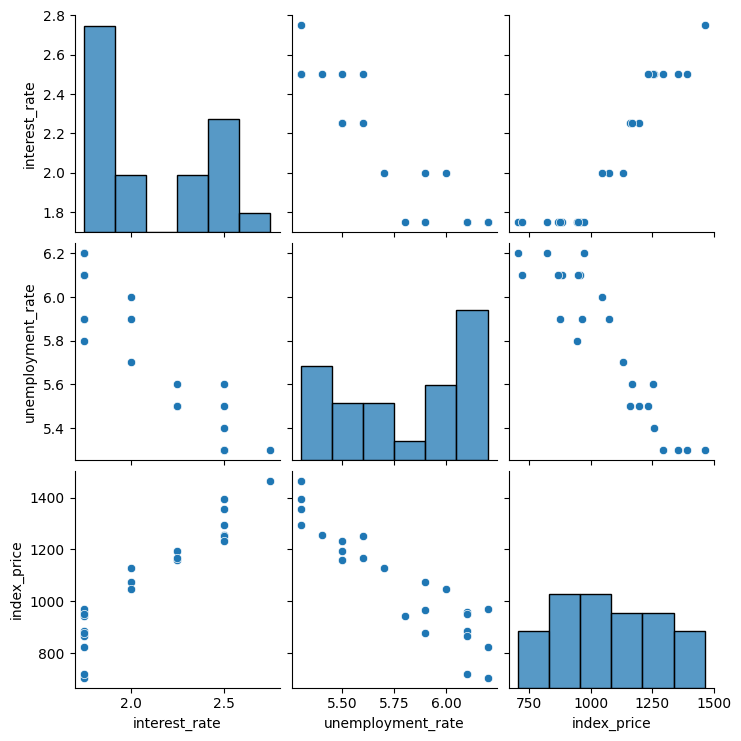

In [49]:
## Lets do some visualization
sns.pairplot(df)

In [50]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

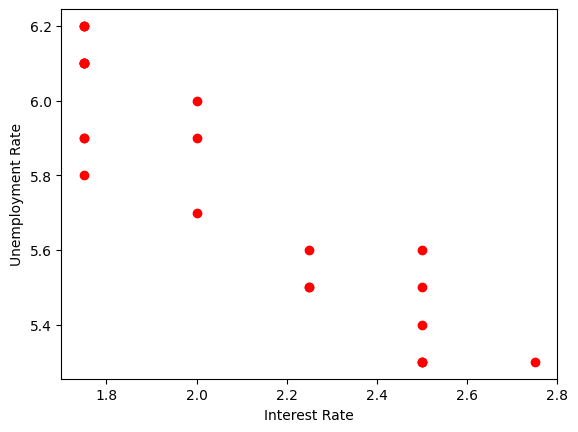

In [51]:
## Visualize the data more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [52]:
## Independent and Dependent Features
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [53]:
X.head()


,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [54]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [55]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

<Axes: xlabel='interest_rate', ylabel='index_price'>

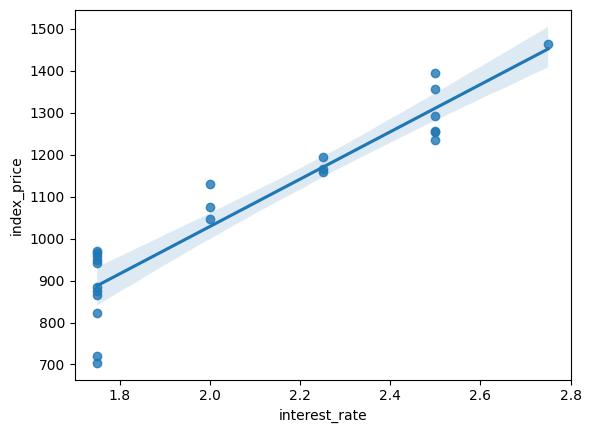

In [56]:
sns.regplot(x='interest_rate', y='index_price', data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

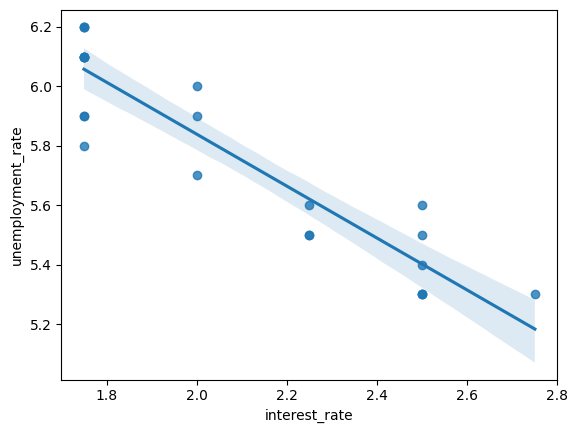

In [57]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [59]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [60]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [61]:
regression.fit(X_train,Y_train)

LinearRegression()

In [62]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [63]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [64]:
## Prediction

Y_pred = regression.predict(X_test)

In [65]:
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [66]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306607
73.80444932337097
90.04758423359623


In [68]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,Y_pred)
print(score)
## adjusted r squared
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7591371539010257


0.5985619231683761

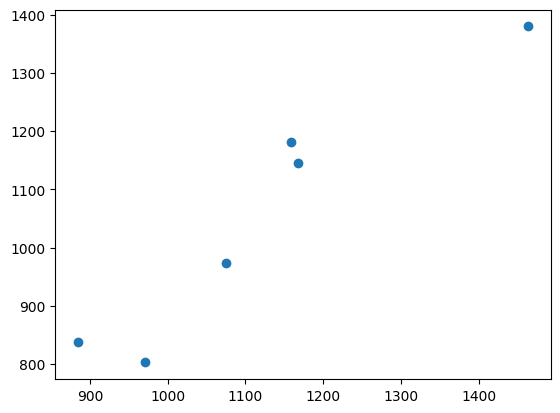

In [70]:
## Assumptions
plt.scatter(Y_test,Y_pred)

In [71]:
residuals = Y_test - Y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


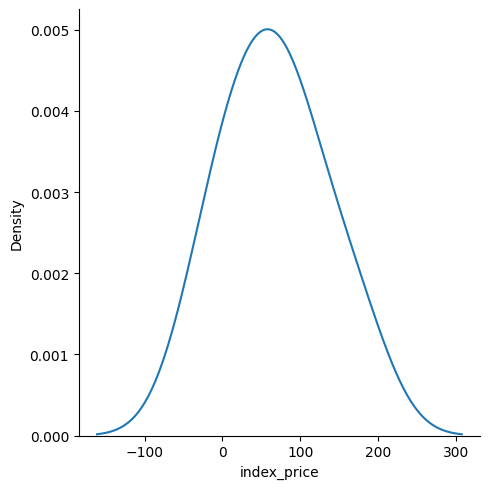

In [ ]:
## Plot This Residuals 

sns.displot(residuals,kind='kde')

## if the plot is normal districbution then prediction is correct.

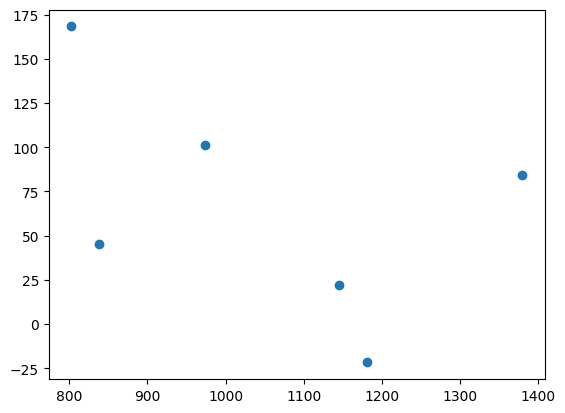

In [ ]:
## Scatter plot wrt predictions and residuals
plt.scatter(Y_pred,residuals)

## if the plot is uniformly distributed then correct prediction.

In [74]:
## OLS Linear regression

import statsmodels.api as sm

In [75]:
model = sm.OLS(Y_train,X_train).fit()

In [76]:
prediction = model.predict(X_test)

In [77]:
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [79]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 02 Apr 2025   Prob (F-statistic):                       0.754
Time:                        00:53:19   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [82]:
## Prediciton for new Data
regression.predict(scaler.transform([[2.8,5.3]]))

/Users/vaibhavkale/ML Learnings/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1392.58671956])